In [306]:
pip install cloudscraper

Note: you may need to restart the kernel to use updated packages.


Scraping data from the S&P 500 index

In [307]:
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper

url = 'https://www.slickcharts.com/sp500'
scraper = cloudscraper.create_scraper(browser = 'chrome') # you can try 'firefox' here too?
page = scraper.get(url).text  # get the raw html text
soup = BeautifulSoup(page, 'html.parser') # convert html text to BeautifulSoup object

table1 = soup.find('table', class_='table-borderless') # get the first table
table1_head = table1.find_all('th') # isolate the head since this has the column headers we want
table1_body = table1.find('tbody') # isolate table body since this has the data aka "guts"

# Get headers of table (i.e., #, Company, Symbol, etc)
headers = []
for i in table1_head:
    # extract just the value using .string (i.e., Company, Symbol, etc) and clean it up
    headers.append(i.string.text.strip())

# Get the "guts" aka all data 
all_data = []  # set up a list where we'll store our final data
rows = table1_body.find_all('tr') # get all the rows first, in each row there will be data
for row in rows:  # loop through each row
    cols = row.find_all('td') # in the given row, find the data we'll need
    cols = [ele.text.strip() for ele in cols] # extract the data for the given row and clean it up
    all_data.append([ele for ele in cols]) # add the current data to our python list called "all_data"

# Print everything out
print(headers)
for item in all_data[:10]: # [:10] means go through the first 10 items in the list, can change to 20, etc
    print(item)

['#', 'Company', 'Symbol', 'Weight', 'Price', 'Chg', '% Chg']
['1', 'Apple Inc.', 'AAPL', '6.337047', '140.19', '-2.34', '(-1.64%)']
['2', 'Microsoft Corporation', 'MSFT', '5.364604', '239.50', '-2.54', '(-1.05%)']
['3', 'Amazon.com Inc.', 'AMZN', '2.541796', '94.88', '-1.44', '(-1.49%)']
['4', 'Alphabet Inc. Class A', 'GOOGL', '1.735091', '94.54', '-3.16', '(-3.23%)']
['5', 'Berkshire Hathaway Inc. Class B', 'BRK.B', '1.667633', '309.97', '-1.33', '(-0.43%)']
['6', 'Alphabet Inc. Class C', 'GOOG', '1.561851', '96.05', '-3.17', '(-3.19%)']
['7', 'NVIDIA Corporation', 'NVDA', '1.427845', '188.97', '-3.68', '(-1.91%)']
['8', 'Exxon Mobil Corporation', 'XOM', '1.393576', '112.19', '-1.63', '(-1.43%)']
['9', 'UnitedHealth Group Incorporated', 'UNH', '1.365696', '489.79', '-1.81', '(-0.37%)']
['10', 'Johnson & Johnson', 'JNJ', '1.3098', '168.52', '0.21', '(0.12%)']


## Reshaping this data using pandas by sorting the firms by price and only including the top 10 firms

In [308]:
#Make a data frame with all this data
df = pd.DataFrame(all_data, columns=headers)


In [309]:
print(df)

       #                           Company Symbol    Weight   Price    Chg  \
0      1                        Apple Inc.   AAPL  6.337047  140.19  -2.34   
1      2             Microsoft Corporation   MSFT  5.364604  239.50  -2.54   
2      3                   Amazon.com Inc.   AMZN  2.541796   94.88  -1.44   
3      4             Alphabet Inc. Class A  GOOGL  1.735091   94.54  -3.16   
4      5   Berkshire Hathaway Inc. Class B  BRK.B  1.667633  309.97  -1.33   
..   ...                               ...    ...       ...     ...    ...   
498  499           Lumen Technologies Inc.   LUMN  0.014348    5.25  -0.05   
499  500           Fox Corporation Class B    FOX  0.013313   31.30   0.67   
500  501                       DaVita Inc.    DVA  0.012758   77.04  -0.27   
501  502  DISH Network Corporation Class A   DISH   0.01045   14.23  -0.05   
502  503          News Corporation Class B    NWS  0.007215   21.09   1.18   

        % Chg  
0    (-1.64%)  
1    (-1.05%)  
2    (-1.49%)  

In [310]:
#Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        503 non-null    object
 1   Company  503 non-null    object
 2   Symbol   503 non-null    object
 3   Weight   503 non-null    object
 4   Price    503 non-null    object
 5   Chg      503 non-null    object
 6   % Chg    503 non-null    object
dtypes: object(7)
memory usage: 27.6+ KB


In [311]:
#Check for missing values
df.isnull()

,#,Company,Symbol,Weight,Price,Chg,% Chg
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
498,False,False,False,False,False,False,False
499,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False


In [312]:
df.isna().sum()

#          0
Company    0
Symbol     0
Weight     0
Price      0
Chg        0
% Chg      0
dtype: int64

Converting the data in each column to numeric data

In [313]:
#Change the Price and Change values from an object to a numeric datatype
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Chg'] = pd.to_numeric(df['Chg'], errors='coerce')

In [314]:
#Remove the Percentage Symbol and Brackets from the percentage change column
df['% Chg'] = df['% Chg'].str.replace('%', '')
df['% Chg'] = df['% Chg'].str.replace('(', '')
df['% Chg'] = df['% Chg'].str.replace(')', '')

C:\Users\akhil\AppData\Local\Temp\ipykernel_10084\180457599.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['% Chg'] = df['% Chg'].str.replace('(', '')
C:\Users\akhil\AppData\Local\Temp\ipykernel_10084\180457599.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['% Chg'] = df['% Chg'].str.replace(')', '')


In [315]:
#Sort the firms by price in descending order
df.sort_values("Price", ascending=False, inplace=True)


In [316]:
#Print the data for the top 10 firms
print(df.head(10))

       #                         Company Symbol    Weight   Price    Chg  \
147  148        O'Reilly Automotive Inc.   ORLY  0.148685  799.20   0.11   
99   100  Regeneron Pharmaceuticals Inc.   REGN  0.230931  740.18  12.71   
72    73                  BlackRock Inc.    BLK  0.335928  734.30 -17.77   
109  110                    Equinix Inc.   EQIX  0.197989  716.68  -2.94   
215  216    TransDigm Group Incorporated    TDG  0.106055  695.73   1.48   
23    24                   Broadcom Inc.   AVGO  0.704497  581.20  -3.83   
26    27   Thermo Fisher Scientific Inc.    TMO  0.677184  574.26  -6.46   
278  279              W.W. Grainger Inc.    GWW   0.07659  567.53  -3.31   
122  123                     Humana Inc.    HUM  0.188348  502.62   2.27   
180  181               MSCI Inc. Class A   MSCI  0.124437  502.12 -17.72   

     % Chg  
147   0.01  
99    1.75  
72   -2.36  
109  -0.41  
215   0.21  
23   -0.66  
26   -1.11  
278  -0.58  
122   0.45  
180  -3.41  


In [317]:
#Create a new dataframe with the data for just the top 10 firms
df_10 = df.head(10)

In [318]:
print(df_10)

       #                         Company Symbol    Weight   Price    Chg  \
147  148        O'Reilly Automotive Inc.   ORLY  0.148685  799.20   0.11   
99   100  Regeneron Pharmaceuticals Inc.   REGN  0.230931  740.18  12.71   
72    73                  BlackRock Inc.    BLK  0.335928  734.30 -17.77   
109  110                    Equinix Inc.   EQIX  0.197989  716.68  -2.94   
215  216    TransDigm Group Incorporated    TDG  0.106055  695.73   1.48   
23    24                   Broadcom Inc.   AVGO  0.704497  581.20  -3.83   
26    27   Thermo Fisher Scientific Inc.    TMO  0.677184  574.26  -6.46   
278  279              W.W. Grainger Inc.    GWW   0.07659  567.53  -3.31   
122  123                     Humana Inc.    HUM  0.188348  502.62   2.27   
180  181               MSCI Inc. Class A   MSCI  0.124437  502.12 -17.72   

     % Chg  
147   0.01  
99    1.75  
72   -2.36  
109  -0.41  
215   0.21  
23   -0.66  
26   -1.11  
278  -0.58  
122   0.45  
180  -3.41  


In [319]:
#checking for missing values with new dataframe
df_10.isna().sum()

#          0
Company    0
Symbol     0
Weight     0
Price      0
Chg        0
% Chg      0
dtype: int64

## Using visualisations to present the data from the dataframe

In [320]:
# Create a list from the price and symbol column in the DataFrame
column_name = 'Price'
column_list_price = df_10[column_name].tolist()
top_firm_price = column_list_price[:10]
print(top_firm_price)


[799.2, 740.18, 734.3, 716.68, 695.73, 581.2, 574.26, 567.53, 502.62, 502.12]


In [321]:
column_name = 'Symbol'
column_list_symbol = df_10[column_name].tolist()
top_firm_symbol = column_list_symbol[:10]
print(top_firm_symbol)

['ORLY', 'REGN', 'BLK', 'EQIX', 'TDG', 'AVGO', 'TMO', 'GWW', 'HUM', 'MSCI']


In [322]:
#Invert the list, so prices are in ascending order
top_price = top_firm_price[::-1]

In [323]:
#Invert the firm's symbols to match their prices
top_firms = top_firm_symbol[::-1]

Text(0.5, 1.0, 'Prices of the shares of the Top Firms')

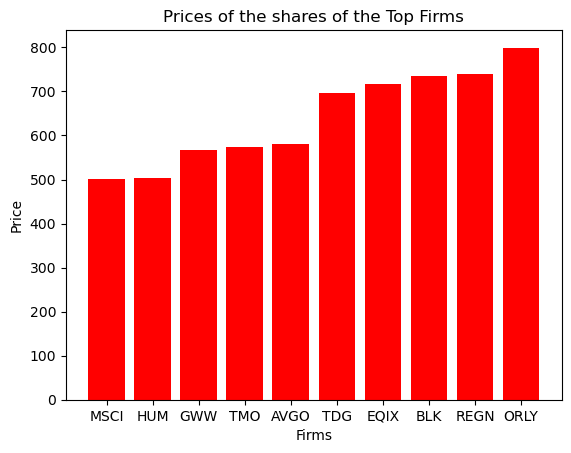

In [324]:
# Create a bar chart displaying the prices for the Top Firms
plt.bar(top_firms,top_price, color='red')
plt.xlabel('Firms')
plt.ylabel('Price')
plt.title('Prices of the shares of the Top Firms')

In [325]:
#Create a list from the price change column
column_name = 'Chg'
column_list_chg = df_10[column_name].tolist()
top_firm_chg = (column_list_chg[:10])[::-1]
print(top_firm_chg)

[-17.72, 2.27, -3.31, -6.46, -3.83, 1.48, -2.94, -17.77, 12.71, 0.11]


Text(0.5, 1.0, 'Price Changes of the shares of the Top Firms')

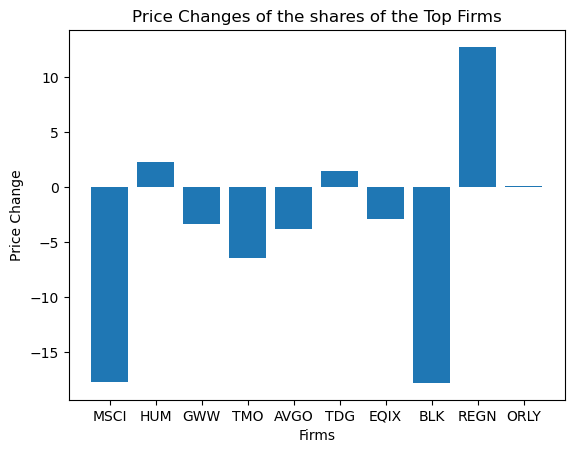

In [326]:
#Make a bar chart showing the price change for each firm
plt.bar(top_firms,top_firm_chg)
plt.xlabel('Firms')
plt.ylabel('Price Change')
plt.title('Price Changes of the shares of the Top Firms')

In [327]:
#Make a list using the percentage change column
column_name = '% Chg'
column_list_chg = df_10[column_name].tolist()
top_firm_per_chg = (column_list_chg[:10])[::-1]
print(top_firm_per_chg)

['-3.41', '0.45', '-0.58', '-1.11', '-0.66', '0.21', '-0.41', '-2.36', '1.75', '0.01']


Text(0.5, 1.0, 'Percentage Change in the Price of the shares of the Top Firms')

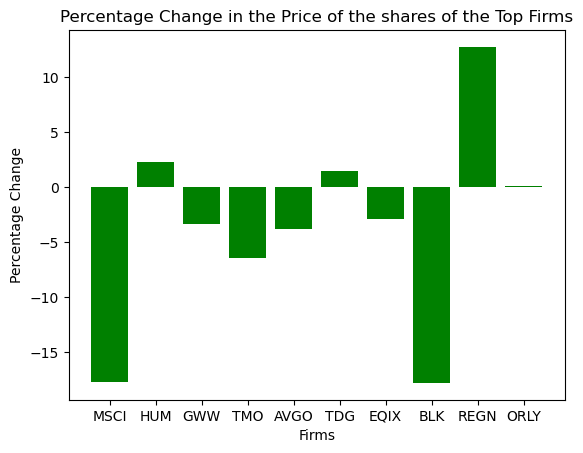

In [328]:
#Make a bar chart for the percentage change in the price of each firm
plt.bar(top_firms,top_firm_chg,color='green')
plt.xlabel('Firms')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in the Price of the shares of the Top Firms')

## Finding the Sectors of these top firms

In [329]:
symbols = top_firm_symbol

In [330]:
#make a dataframe containing the sector information for the top 10 firms
import pandas as pd
from yahooquery import Ticker


tickers = Ticker(symbols, asynchronous=True)

datasi = tickers.get_modules("summaryProfile quoteType")
dfsi = pd.DataFrame.from_dict(datasi).T
dataframes = [pd.json_normalize([x for x in dfsi[module] if isinstance(x, dict)]) for
module in ['summaryProfile', 'quoteType']]

dfsi = pd.concat(dataframes, axis=1)

dfsi = dfsi.set_index('symbol')
dfsi = dfsi.loc[symbols]

print(dfsi[['industry', 'sector']])

                                industry              sector
symbol                                                      
ORLY                    Specialty Retail   Consumer Cyclical
REGN                       Biotechnology          Healthcare
BLK                     Asset Management  Financial Services
EQIX                      REIT—Specialty         Real Estate
TDG                  Aerospace & Defense         Industrials
AVGO                      Semiconductors          Technology
TMO               Diagnostics & Research          Healthcare
GWW              Industrial Distribution         Industrials
HUM                     Healthcare Plans          Healthcare
MSCI    Financial Data & Stock Exchanges  Financial Services


In [331]:
#Find how many firms are in each sector
dfsi.groupby('sector').size()

sector
Consumer Cyclical     1
Financial Services    2
Healthcare            3
Industrials           2
Real Estate           1
Technology            1
dtype: int64

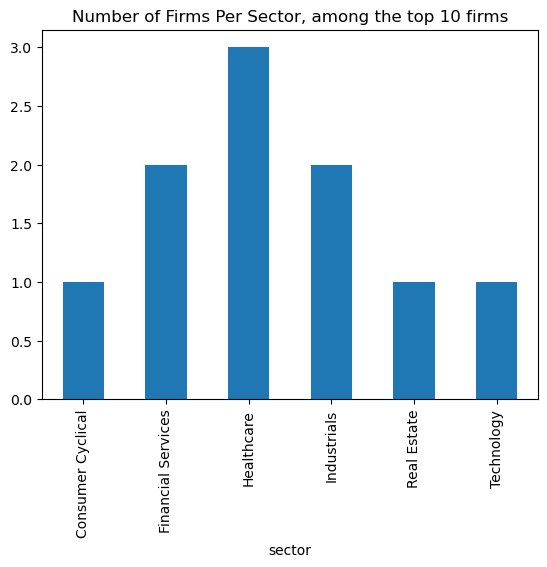

Text(0.5, 1.0, 'Proportion of sectors among the top 10 Firms')

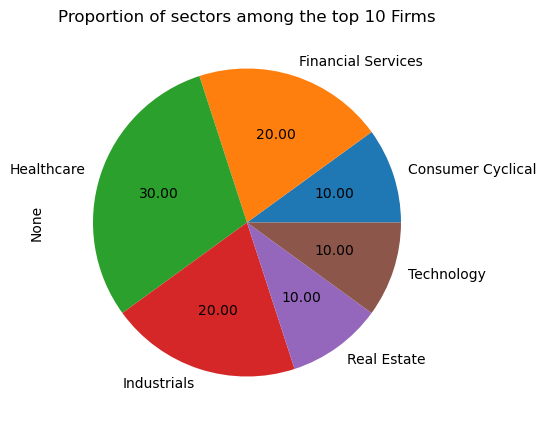

In [332]:
#Plot this data in a pie chart and a bar chart
dfsi.groupby('sector').size().plot(kind='bar')
plt.title("Number of Firms Per Sector, among the top 10 firms")
plt.show()
dfsi.groupby('sector').size().plot.pie(autopct='%.2f', figsize=(5,5))
plt.title("Proportion of sectors among the top 10 Firms")

In [333]:
#New data frame containing the data of the top 20 firms
df_20 = df.head(20)

In [334]:
#List of the symbols of the top 20 firms
column_name_2 = 'Symbol'
column_list_symbol_2 = df_20[column_name_2].tolist()
top_20_firm_symbols = column_list_symbol_2[:20]
print(top_20_firm_symbols)

['ORLY', 'REGN', 'BLK', 'EQIX', 'TDG', 'AVGO', 'TMO', 'GWW', 'HUM', 'MSCI', 'ULTA', 'UNH', 'COST', 'ELV', 'IDXX', 'LRCX', 'NOC', 'LMT', 'BIO', 'ROP']


In [335]:
#Finding the sector information for the top 20 firms
import pandas as pd
from yahooquery import Ticker


tickers = Ticker(top_20_firm_symbols, asynchronous=True)

datasi = tickers.get_modules("summaryProfile quoteType")
dfsi = pd.DataFrame.from_dict(datasi).T
dataframes = [pd.json_normalize([x for x in dfsi[module] if isinstance(x, dict)]) for
module in ['summaryProfile', 'quoteType']]

dfsi = pd.concat(dataframes, axis=1)

dfsi = dfsi.set_index('symbol')
dfsi = dfsi.loc[top_20_firm_symbols]

print(dfsi[['industry', 'sector']])

                                   industry              sector
symbol                                                         
ORLY                       Specialty Retail   Consumer Cyclical
REGN                          Biotechnology          Healthcare
BLK                        Asset Management  Financial Services
EQIX                         REIT—Specialty         Real Estate
TDG                     Aerospace & Defense         Industrials
AVGO                         Semiconductors          Technology
TMO                  Diagnostics & Research          Healthcare
GWW                 Industrial Distribution         Industrials
HUM                        Healthcare Plans          Healthcare
MSCI       Financial Data & Stock Exchanges  Financial Services
ULTA                       Specialty Retail   Consumer Cyclical
UNH                        Healthcare Plans          Healthcare
COST                        Discount Stores  Consumer Defensive
ELV                        Healthcare Pl

In [336]:
#Finding how many firms from the top 20 are in each sector
dfsi.groupby('sector').size()

sector
Consumer Cyclical     2
Consumer Defensive    1
Financial Services    2
Healthcare            7
Industrials           5
Real Estate           1
Technology            2
dtype: int64

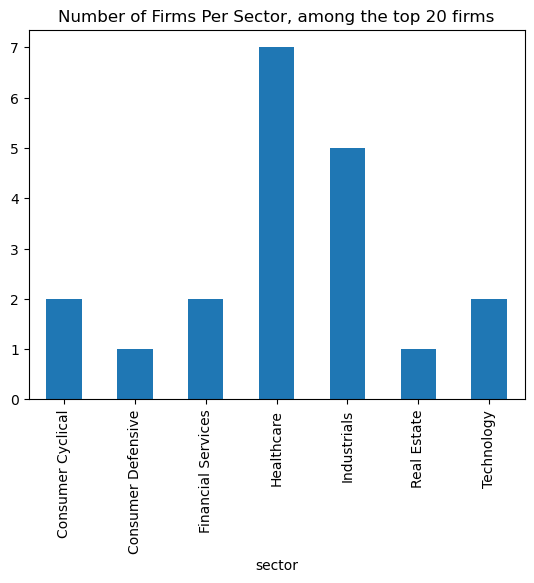

Text(0.5, 1.0, 'Proportion of sectors among the top 20 Firms')

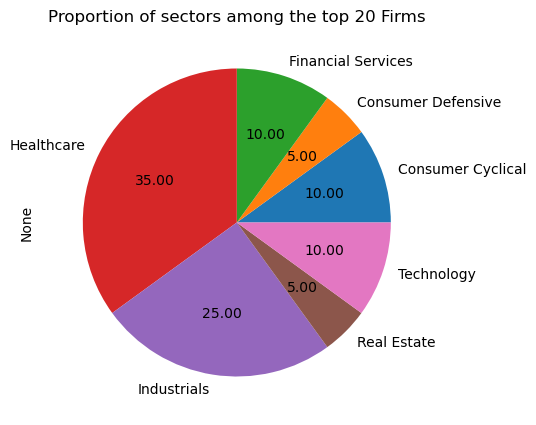

In [337]:
#Plot this data in a pie chart and bar chart
dfsi.groupby('sector').size().plot(kind='bar')
plt.title("Number of Firms Per Sector, among the top 20 firms")
plt.show()
dfsi.groupby('sector').size().plot.pie(autopct='%.2f', figsize=(5,5))
plt.title("Proportion of sectors among the top 20 Firms")